In [ ]:
# FATHIMA IRFANA N P
# ROLL NO :30
# AIM = Write a Program to implement Decision tree classifier using the dataset iris.csv and find the accuracy of algorithm

In [ ]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

# importing datasets
df= pd.read_csv('/content/iris.csv')
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'species'],
      dtype='object')

In [ ]:
df.info
print(df)


     sepal.length  sepal.width  petal.length  petal.width    species
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [ ]:
df.species.value_counts()

,count
species,
Setosa,50
Versicolor,50
Virginica,50


In [ ]:
y=df['species']
x= df.drop(['species'],axis=1)
print(x)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )

#Feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)


In [ ]:
#Fitting a Decision Tree algorithm to the Training set
from sklearn import tree

classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[Text(0.5, 0.9166666666666666, 'x[3] <= -0.559\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 0.671\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 0.638\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 0.542\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 0.412\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]')

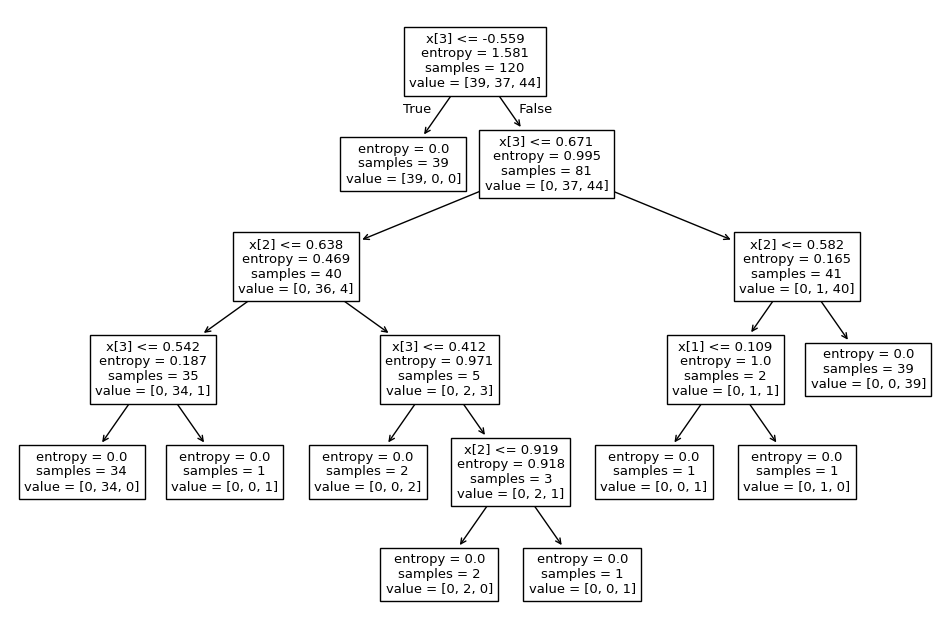

In [ ]:
#Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(classifier)

In [ ]:
print(y_train)

137     Virginica
84     Versicolor
27         Setosa
127     Virginica
132     Virginica
          ...    
9          Setosa
103     Virginica
67     Versicolor
117     Virginica
47         Setosa
Name: species, Length: 120, dtype: object


In [ ]:
##Visualize decision-trees with graphviz
##execute the command 'sudo apt-get install graphviz' in the terminal
!pip install graphviz
import graphviz


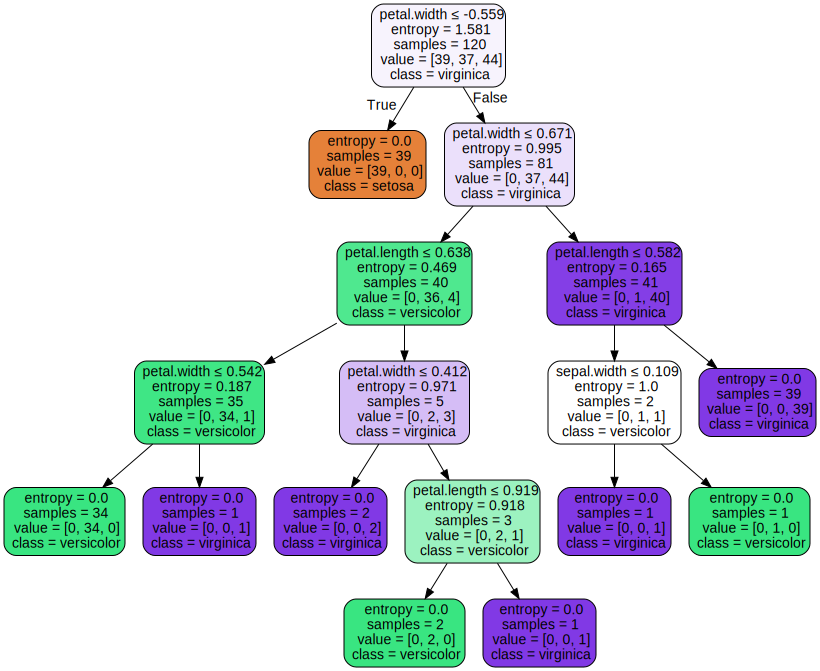

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=x.columns,
                                class_names=['setosa','versicolor', 'virginica'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
y_pred= classifier.predict(x_test)
print(y_pred)

['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa']


In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


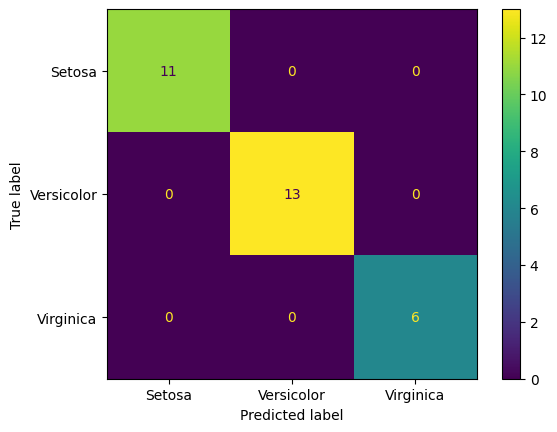

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()

In [ ]:
#check test accuracy
from sklearn.metrics import accuracy_score
print('Test accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Test accuracy score with criterion entropy: 1.0000


In [ ]:
#check training accuracy
y_pred_train= classifier.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000
